<a href="https://colab.research.google.com/github/siwakornnitkit/NewTop/blob/master/Project_DSI200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> สมาชิก



---


1.วิชัย มาเจริญ        6424650379   
2.ศิวกร นิตย์กิจสมบูรณ์  6424650395  
3.วรดนัย วงษ์มณี      6424650189  
4.ศุภิสรา ประสงค์สุข   6424650437


**คำนำ**


      รายงานเล่มนี้จัดทำขึ้นเพื่อเป็นส่วนหนึ่งของรายวิชา DSI200 โดยมีจุดประสงค์เพื่อวิเคราะห์ข้อมูลตามที่ได้รับมอบหมาย




# **จุดประสงค์**


จุดประสงค์ในการสร้าง Data Visualization คือ การนำข้อมูลแบบสอบถามของนักศึกษาจาก urlมาวิเคราะห์หาจุดบกพร่องในการสอนของวิชาหรือ
Sec นั้น ๆ เพื่อนำไปปรับปรุงแก้ไขและนำไปพยากรณ์ถึงคะแนนเฉลี่ยที่จะได้ในอนาคต หรือแม้จะหาสิ่งที่นักศึกษาที่ร่วมทำแบบประเมินต้องการการเรียนการสอนแบบใด อีกทั้งยังมีข้อมูลแบบสอบถามในปีที่มีการแพร่ระบาดของ Covid-19 เพื่อมาวิเคราะห์การเตรียมความพร้อมในการรับมือกับสถานการณ์นี้ เป็นไปได้อย่างราบรื่นหรือบกพร่องตรงไหนก็สามารถนำไปปรับปรุงในเทอมต่อมาได้


### **สารบัญ**
---

###    1.อธิบายข้อมูลแต่ละรายวิชา
*   มีการประเมินมาแล้วกี่รอบและในแต่ละรายวิชามีการประเมินกี่ครั้ง
*   มีผู้ร่วมทำแบบทดสอบกี่คน
*   จำนวนวิชาทั้งหมด
*   ค่าเฉลี่ยรวมของสถานการณ์ทั่วไปและในช่วง Covid


###    2.นักศึกษาให้ความสนใจกับการประเมินมาก-น้อยเพียงใด


###    3.การพัฒนาของแต่ละรายวิชาในการประเมินแบบสถานการณ์ปกติ


*   เปรียบเทียบนักศึกษาที่ลงทะเบียนกับจำนวนผู้ที่ทำแบบประเมิน
*   แต่ละรายวิชาเติบโตไปในทิศทางใด
*   ในหนึ่งปีการศึกษามีวิชาใดได้รับการประเมินสูง


###    4.ในแต่ละวิชามีความเตรียมพร้อมในการรับมือกับรูปแบบการสอนในช่วง Covid มาก-น้อยเพียงใด

นี่คือcode ในการดึงข้อมูลจาก web page จำนวน 19 เว็ปไซต์

In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np

main_url = 'https://sgulyano.github.io/eval/'
html_url = ['01888961.html', 
            '34765352.html', 
            '59077969.html', 
            '87385371.html',
            '94578503.html',
            '09934285.html',
            '35676402.html',
            '63740399.html',
            '87545994.html',
            '95850887.html',
            '16585447.html',
            '57138607.html',
            '69893123.html',
            '89244427.html',
            '98742007.html',
            '33737452.html',
            '58806234.html',
            '83499032.html',
            '90151389.html']
eval_url = [main_url + url for url in html_url]

def get_table_data(item):  #การดึงข้อมูล
    data = []
    table_body = item.find('tbody')
    rows = table_body.find_all('tr')
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    return data

all_info = []
all_ratings = []

for url in eval_url:   #สรุป
    r = requests.get(url)
    soup = BeautifulSoup(r.content, "html.parser")
    tables = soup.find_all("table")

    all_info.append(get_table_data(tables[0]))
    all_ratings.append(get_table_data(tables[2]))
data = all_info,all_ratings

1.อธิบายข้อมูลแต่ละรายวิชา 

In [ ]:

# มีการประเมินมาแล้วกี่รอบและในแต่ละรายวิชามีการประเมินกี่ครั้ง
a = []
count = {}
for i in range(len(html_url)):   #เป็นการดึงชื่อวิชาของแต่ละเว็ปไซต์ 
    a.append(data[0][i][0][1])     #ตำแหน่ง data[a][b][c][d] aคือเลือกส่วน all_info หรือ all_ratings bคือเลขลำดับของurl cลำดับcolumn dลำดับrow


for i in a:
    count[i]=count.get(i,0)+1  #การนับจำนวนวิชาว่าแต่ละวิชามีจำนวนกี่ลิ้ง

print('All:',len(html_url)) 
print(count)


# มีผู้ร่วมทำแบบทดสอบกี่คน

membernormal = []
m = []
for i in range(len(html_url)):
    membernormal.append([data[0][i][5][1], i]) #ดึงข้อมูลว่ามีคนเข้าร่วมทำแบบสอบถามกี่คนของทุกเว็ปไซต์

for a in range(len(html_url)):
    n = int(membernormal[a][0].split()[0])   ##เนื่องจากข้อมูลบ่งบอกถึงเปอร์เซ็นการเข้าร่วม เราจึงใช้คำสั่ง split เพื่อเอาเฉพาะตัวหน้า
    m.append(n)
print("participants=", sum(m))   ##การหาผลรวมของlistข้างต้น


# จำนวนวิชาทั้งหมด
subject = []
for i in range(len(html_url)):
    if data[0][i][0][1] not in subject: #การตัดวิชาที่ซ้ำทิ้งออก
        subject.append(data[0][i][0][1])
    else:
        pass
print("Subject=",subject)


xbarnormal = []
xbarcovid = []
for i in range(len(html_url)):
    if len(data[1][i][4][1]) < 17: ##เนื่องจากเราต้องแยกการประเมินแบบnormalและแบบcovid ออกจากกัน เราเห็นข้อแตกต่างระหว่างทั้ง2คือ ตัวที่ data[1][i][4][1] ถ้าหากเป็นแบบ ธรรมดาจะมีจำนวนตัวอักษรมากกว่า17ตัว
        xbarnormal.append(data[1][i][-1][-2])   
    else:  ##และแบบcovidมีอักษรน้อยกว่า17ตัว
        xbarcovid.append(data[1][i][-1][-2]) 

# ค่าเฉลี่ยรวมของสถานการณ์ทั่วไปและในช่วง Covid
tfxbarnormal = []
for a in xbarnormal:
    tfxbarnormal.append(float(a))
print('X-bar of normal evaluationmean normal=', sum(tfxbarnormal)/len(xbarnormal))  ##การหาค่าเฉลี่ยของแต่ละตัว โดยการนำผลรวมของx-barมาหารจำนวนทั้งหมด

tfxbarcovid = []
for b in xbarcovid:
    tfxbarcovid.append(float(b))
print('X-bar of Covid-19 evaluation=', sum(tfxbarcovid)/len(xbarcovid))





All: 19
{'ryoivricfq': 3, 'bbdfmowkmw': 5, 'nxwvugfpvk': 4, 'ifryvhdgto': 2, 'tqkcxncfqb': 2, 'thwqmxkbbs': 1, 'liprvrawzt': 1, 'eguuthmvfq': 1}
participants= 677
Subject= ['ryoivricfq', 'bbdfmowkmw', 'nxwvugfpvk', 'ifryvhdgto', 'tqkcxncfqb', 'thwqmxkbbs', 'liprvrawzt', 'eguuthmvfq']
X-bar of normal evaluationmean normal= 4.237272727272727
X-bar of Covid-19 evaluation= 4.28125


2.นักศึกษาให้ความสนใจกับการประเมินมาก-น้อยเพียงใด

In [ ]:

# ขั้นตอนการหาจำนวนนักศึกษาทั้งหมด นักศึกษาที่ทำการประเมิน และ นักศึกษาที่ไม่ได้ทำแบบประเมิน
memberall = []
m = []
for i in range(len(html_url)):
    memberall.append([data[0][i][5][1], i])  #การดึงข้อมูลจำนวนนักเรียนที่ทำแบบสอบถาม

for a in range(len(html_url)):
    n = int(memberall[a][0].split()[0])  ##เนื่องจากข้อมูลบ่งบอกถึงเปอร์เซ็นการเข้าร่วม เราจึงใช้คำสั่ง split เพื่อเอาเฉพาะตัวหน้า
    m.append(n)

permemberall = []
studentall = []
g = []

for w in range(len(html_url)):
    studentall.append(int(data[0][w][4][1]))   ##การดึงข้อมูลของนักเรียนทั้ง รวมถึงนักเรียนที่ไม่ได้ทำแบบประเมินด้วย

permemberall =  sum(m)/sum(studentall)*100    ##การหาค่าว่าจำนวนนักศึกษามีเปอร์เซ็นการเข้าร่วมของทั้ง19เว็ปไซต์เท่าไหร่ โดยคิดจาก ผลรวมของนักเรียนที่่ทำประเมิน/จำนวนนักเรียนทั้งหมด * 100


print("มีจำนวนนักศึกษาที่จดทะเบียนทั้งหมด=", sum(studentall))
print("มีจำนวนนักศึกษาที่ประเมิน=", sum(m))
print("มีนักเรียนที่ไม่ได้ทำแบบประเมินทั้งหมด" , sum(studentall)-sum(m), "คน")
print("คิดเป็น", "%.3f" %permemberall , "ของจำนวนนักศึกษา")


มีจำนวนนักศึกษาที่จดทะเบียนทั้งหมด= 2537
มีจำนวนนักศึกษาที่ประเมิน= 677
มีนักเรียนที่ไม่ได้ทำแบบประเมินทั้งหมด 1860 คน
คิดเป็น 26.685 ของจำนวนนักศึกษา


participants =  677  people
not participant =  1860  people


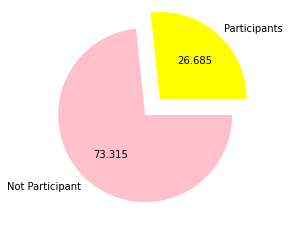

In [ ]:
##การทำ pie เพื่อแสดงร้อยละจำนวนนักเรียนที่ทำแบบประเมินและไม่ได้ทำแบบประเมิน
x = [677,1860]  ##ประกอบด้วยจำนวนนักเรียนที่ทำแบบประเมิน และนักเรียนที่ไม่ได้ทำแบบประเมิน
y = ["Participants","Not Participant"]

print("participants = ",x[0]," people")
print("not participant = ",x[1]," people")

exp = [0.25,0] ##ทำให้ส่วนนักศึกษาที่ทำการประเมินเด้งออกมาข้างนอก
color = ["yellow","pink"] ##ใส่สีในpie
plt.pie(x,labels=y,autopct="%.3f",colors=color,explode=exp) ##การใส่ข้อมูลลงไปในpie ใช้เป็นร้อยละและทศนิยม 3 ตำแหน่ง
plt.show()

3.การพัฒนาของแต่ละรายวิชาในการประเมินแบบสถานการณ์ปกติ

In [ ]:

##เป็นโค้ดที่ทำให้พวกเราเห็นข้อมูลที่ต้องในทั้ง13เว็ปไซต์โดยง่าย โดยการเรียงออกมา

xbar_normal = []  
xbar_covid = []

for i in range(len(html_url)):
    if len(data[1][i][4][1]) < 17: 
        xbar_normal.append([(data[0][i][0][1]),(data[0][i][2][1]).split("/")[::-1],(data[1][i][-1][-2]), i ])
    else:
        xbar_covid.append([(data[0][i][0][1]),(data[0][i][2][1]).split("/")[::-1],(data[1][i][12][-2]), i ])
print('normal')
for i in sorted(xbar_normal):
    print(i)
print('covid')
for i in sorted(xbar_covid):
    print(i)

##ข้อมูลที่เรียงตามปีแล้ว


normal
['bbdfmowkmw', ['2562', '1'], '4.19', 1]
['eguuthmvfq', ['2562', '2'], '4.09', 15]
['ifryvhdgto', ['2561', '2'], '4.45', 3]
['liprvrawzt', ['2563', '1'], '4.35', 11]
['nxwvugfpvk', ['2561', '2'], '4.17', 9]
['nxwvugfpvk', ['2562', '1'], '4.07', 2]
['ryoivricfq', ['2561', '2'], '4.04', 5]
['ryoivricfq', ['2562', '1'], '4.44', 12]
['ryoivricfq', ['2563', '1'], '3.81', 0]
['tqkcxncfqb', ['2563', '1'], '4.42', 18]
['tqkcxncfqb', ['2563', '1'], '4.58', 7]
covid
['bbdfmowkmw', ['2562', '2'], '4.15', 17]
['bbdfmowkmw', ['2563', '2'], '4.25', 6]
['bbdfmowkmw', ['2563', '2'], '4.35', 14]
['bbdfmowkmw', ['2563', '2'], '4.60', 10]
['ifryvhdgto', ['2563', '2'], '4.52', 4]
['nxwvugfpvk', ['2562', '2'], '3.52', 13]
['nxwvugfpvk', ['2563', '2'], '4.48', 16]
['thwqmxkbbs', ['2563', '2'], '4.38', 8]


ตัวอย่างวิชา ryoivricfq (รวมทุก sec)


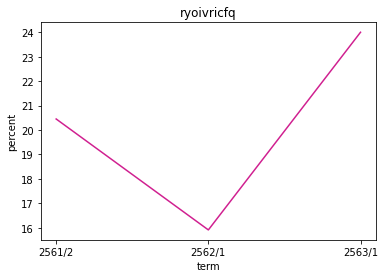

ตัวอย่างวิชา bbdfmowkmw (sec:zwsgaqcugj )


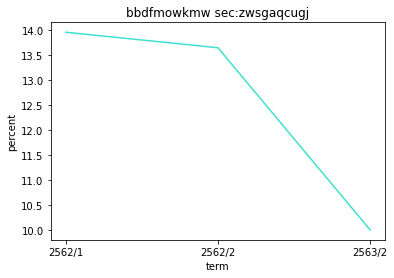

In [ ]:

# เปรียบเทียบนักศึกษาที่ลงทะเบียนกับจำนวนผู้ที่ทำแบบประเมิน(%)
print('ตัวอย่างวิชา ryoivricfq (รวมทุก sec)')
ryo_term = []
ryo_per = []
sort_ryo_term = []
real_ryo_per =[]
w = []
for i in range(len(html_url)):  
    if data[0][i][0][1] == 'ryoivricfq':  ##การเลือกดึงข้อมูลเฉพาะวิชาryoivricfqเท่านั้น
        ryo_term.append((data[0][i][2][1]).split("/")[::-1]) ##แยกระหว่างเทอมกับปีและเรียงกลับย้อนหลัง เพื่อจะทำให้มันเรียงตามลำดับได้
        w = sorted(ryo_term)  #การเรียงลำดับข้อมูลตามปีโดยใช้ sorted
        ryo_per.append(data[0][i][5][1].split(" ")) ##เนื่องจากข้อมูลตัวdata[0][i][5][1] ติดกันเราจึงแยกกันโดยใช้คำสั่งsplit

for a in range(len(ryo_term)):
    sort_ryo_term.append("/".join(w[a]))  ##หลังจากเรียงข้อมูลเสร็จแล้ว จึงใช้คำสั่งjoin และเครื่องหมาย"/" เพื่อรวม ทั้งสองเข้าด้วยกัน
    
for b in range(len(ryo_per)):
    real_ryo_per.append(float(ryo_per[b][1].strip("()%")))  ##ต้องการเฉพาะเปอร์เซ็นการเข้าร่วม จึงเลือกตำแหน่่งที่ 1 และตัดเครื่องหมาย "()%" และเปลี่ยนข้อม฿ลเป็นfloat เพื่อที่จะพลอตได้
    
    
# print(real_ryo_per)
# print(sort_ryo_term)

xryo=np.array(real_ryo_per)  ##เนื่องจากmatplotlibต้องใช้ชุดเลขarray จึงต้องเปลี่ยน listให้กลายเป็น arrayเสียก่อน
yryo=np.array(sort_ryo_term)

plt.plot(yryo,xryo,color="#D02090")  ##เป็นส่วนของการสร้างกราฟเส้น
plt.xlabel("term")
plt.ylabel("percent")
plt.title("ryoivricfq")
plt.show()


print('ตัวอย่างวิชา bbdfmowkmw (sec:zwsgaqcugj )')  ##เหมือนข้างบนแต่เป็นวิชาbbdfmowkmw (sec:zwsgaqcugj )
bbd_term = []
bbd_per = []
sort_bbd_term = []
real_bbd_per =[]
e = []

for i in range(len(html_url)):
    if data[0][i][0][1] == 'bbdfmowkmw'and data[0][i][1][1] == "zwsgaqcugj" :
        bbd_term.append((data[0][i][2][1]).split("/")[::-1])
        e = sorted(bbd_term)
        bbd_per.append(data[0][i][5][1].split(" "))
        
for a in range(len(bbd_term)):
    sort_bbd_term.append("/".join(e[a]))
    
for b in range(len(bbd_per)):
    real_bbd_per.append(float(bbd_per[b][1].strip("()%")))
    
    
# print(real_bbd_per)
# print(sort_bbd_term)

xbbd=np.array(real_bbd_per)
ybbd=np.array(sort_bbd_term)

plt.plot(ybbd,xbbd,color="#40E0D0")
plt.xlabel("term")
plt.ylabel("percent")
plt.title("bbdfmowkmw sec:zwsgaqcugj")
plt.show()



[3.81, 4.04, 4.44]
['2561/2', '2562/1', '2563/1']


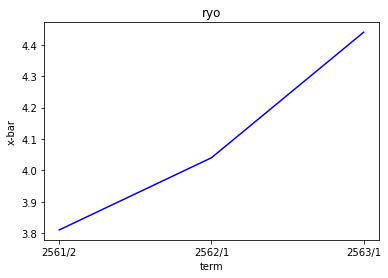

--------------------------------------
[4.07, 4.17]
['2561/2', '2562/1']


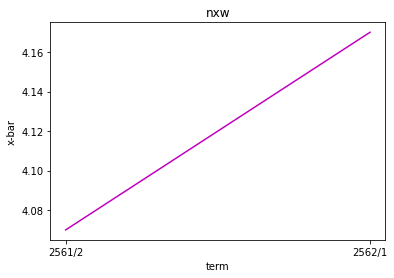

In [ ]:
#แต่ละรายวิชาเติบโตไปในทิศทางใด
real_xbar_ryo = []
sort_term_ryo = []
xbar_ryo = []
term_ryo = []
for a in range(len(html_url)):
    if data[0][a][0][1] == "ryoivricfq" and len(data[1][a][4][1]) < 17 : #เป็นการเลือกดึงข้อมูลเฉพาะวิชาryoivricfq และเป็นแบบประเมินปรกติ
        xbar_ryo.append(data[1][a][-1][-2]) #การดึงข้อมูล x-bar
        term_ryo.append(data[0][a][2][1].split("/")[::-1])  ##แยกระหว่างเทอมกับปีและเรียงกลับย้อนหลัง เพื่อจะทำให้มันเรียงตามลำดับได้
    else:
        pass

for b in range(len(xbar_ryo)):
    real_xbar_ryo.append(float(xbar_ryo[b])) ##เปลี่ยนเป็น float เพื่อที่จะได้ พลอตกราฟได้

print(real_xbar_ryo)

for a in range(len(term_ryo)):
    sort_term_ryo.append("/".join(term_ryo[a]))  ##หลังจากเรียงข้อมูลเสร็จแล้ว จึงใช้คำสั่งjoin และเครื่องหมาย"/" เพื่อรวม ทั้งสองเข้าด้วยกัน

sort_term_ryo = sorted(sort_term_ryo) #เรียงตามเทอมและปีการศึกษา
print(sort_term_ryo)

x_ryo=np.array(real_xbar_ryo)  ##เนื่องจากmatplotlibต้องใช้ชุดเลขarray จึงต้องเปลี่ยน listให้กลายเป็น arrayเสียก่อน
y_ryo=np.array(sort_term_ryo)

plt.plot(y_ryo,x_ryo,color="b") ##เป็นส่วนของการสร้างกราฟเส้น
plt.xlabel("term")
plt.ylabel("x-bar")
plt.title("ryo")
plt.show()

print("--------------------------------------")

real_xbar_nxw = []  ##เหมือนข้างบนแต่เป็นวิชา nxwvugfpvk
sort_term_nxw = []
xbar_nxw = []
term_nxw = []
for a in range(len(html_url)):
    if data[0][a][0][1] == "nxwvugfpvk" and len(data[1][a][4][1]) < 17:
        xbar_nxw.append(data[1][a][-1][-2])
        term_nxw.append(data[0][a][2][1].split("/")[::-1])
        
    else:
        pass

for b in range(len(xbar_nxw)):
        real_xbar_nxw.append(float(xbar_nxw[b]))

print(real_xbar_nxw)
                

for a in range(len(term_nxw)):
    sort_term_nxw.append("/".join(term_nxw[a]))

sort_term_nxw = sorted(sort_term_nxw)
print(sort_term_nxw)

x_nxw=np.array(real_xbar_nxw)
y_nxw=np.array(sort_term_nxw)

plt.plot(y_nxw,x_nxw,color="m")
plt.xlabel("term")
plt.ylabel("x-bar")
plt.title("nxw")
plt.show()


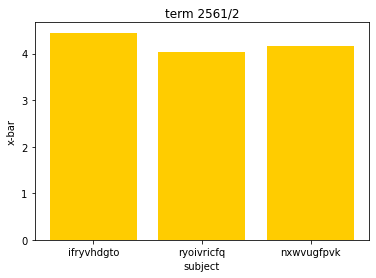

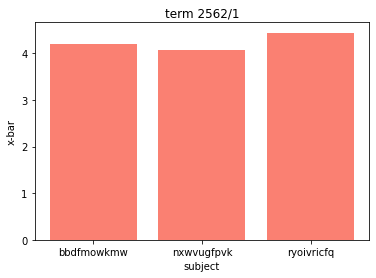

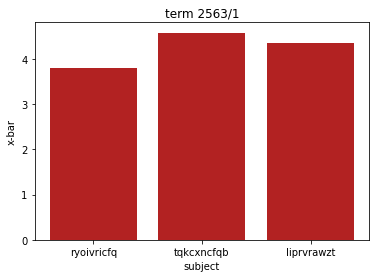

In [ ]:

# ในหนึ่งปีการศึกษามีวิชาใดได้รับการประเมินสูง
xbarnormal = []
joinn = []
for i in range(len(html_url)):
    if len(data[1][i][4][1]) < 17: 
        joinn.append([(data[0][i][2][1]).split("/")[::-1],(data[0][i][0][1]),(data[1][i][-1][-2])]) ##เลือกเฉพาะอันที่ประเมินแบบปรกติ

    else:
        pass
for a in range(len(joinn)):
    xbarnormal.append(["/".join(joinn[a][0]),joinn[a][1],joinn[a][2]]) ##การ รวมของปีและเทอมการศึกษา ชื่อวิชา และ x-bar
# print(sorted(xbarnormal))       
        

xx1 = []   ##การเลือกเก็บข้อมูลของชื่อวิชา แต่ละปีการศึกษา
xx2 = []
xx3 = []
for i in range(len(xbarnormal)):
    if xbarnormal[i][0] == "2561/2":
        xx1.append(xbarnormal[i][1])
    elif xbarnormal[i][0] == "2562/1":
        xx2.append(xbarnormal[i][1])
    elif xbarnormal[i][0] == "2563/1":
        xx3.append(xbarnormal[i][1])
# print(xx1,xx2,xx3)

yy1 = [] ##การเลือกเก็บข้อมูลของx-bar แต่ละปีการศึกษา
yy2 = []
yy3 = []
for i in range(len(xbarnormal)):
    if xbarnormal[i][0] == "2561/2":
        yy1.append(xbarnormal[i][2])
    elif xbarnormal[i][0] == "2562/1":
        yy2.append(xbarnormal[i][2])
    elif xbarnormal[i][0] == "2563/1":
        yy3.append(xbarnormal[i][2])
# print(yy1,yy2,yy3)

op = []
for b in range(len(yy1)):
    op.append(float(yy1[b])) ##เก็บข้อมูลของx-bar ให้เป็น float
    
   
x25612=np.array(xx1)  ##เนื่องจากmatplotlibต้องใช้ชุดเลขarray จึงต้องเปลี่ยน listให้กลายเป็น arrayเสียก่อน
y25612=np.array(op)

plt.bar(x25612,y25612,color="#FFCC00")  ##เป็นส่วนของการสร้างกราฟแท่ง ของปี2561/2
plt.xlabel("subject")
plt.ylabel("x-bar")
plt.title("term 2561/2")
plt.show()

op2 = []
for b in range(len(yy2)):
    op2.append(float(yy2[b]))

x25621=np.array(xx2)
y25621=np.array(op2)

plt.bar(x25621,y25621,color="#FA8072")  ##เป็นส่วนของการสร้างกราฟแท่งของปี2562/1
plt.xlabel("subject")
plt.ylabel("x-bar")
plt.title("term 2562/1")
plt.show()

op3 = []
for b in range(len(yy3)):
    op3.append(float(yy3[b]))

x25631=np.array(xx3) ##เนื่องจากmatplotlibต้องใช้ชุดเลขarray จึงต้องเปลี่ยน listให้กลายเป็น arrayเสียก่อน
y25631=np.array(op3)

plt.bar(x25631,y25631,color="#B22222")  ##เป็นส่วนของการสร้างกราฟแท่งของปี2563/1
plt.xlabel("subject")
plt.ylabel("x-bar")
plt.title("term 2563/1")
plt.show()
    


4.ในแต่ละวิชามีความเตรียมพร้อมในการรับมือกับรูปแบบการสอนในช่วง Covid 
มาก-น้อยเพียงใด

In [ ]:
#เนื่องจากไม่ใช่ทุกวิชาที่จะสามารถนำมาใช้เปรียบเทียบกันในหัวข้อนี้ได้ ต้องเป็นวิชาที่มีการประเมินแบบปรกติ และมีการประเมินแบบcovid ถึงจะสามารถอยู่ในlistนี้ได้

datanormal = []
datacovid = []

for i in range(len(html_url)):  ##ขั้นตอนการหาว่ามีวิชาไหนมีแบบประเมินแบบปรกติและแบบcovidซ้ำบ้าง
    if len(data[1][i][4][1]) < 17: 
        datanormal.append([(data[0][i][0][1]),(data[1][i][-1][-2])])
    else:
        datacovid.append([(data[0][i][0][1]),(data[1][i][12][-2])])
print('normal')
for i in sorted(datanormal):
    print(i)
print('covid')
for i in sorted(datacovid):
    print(i)

    
subjectcanuse = []
subject_can_use = []


for i in range(len(datanormal)):    
    for j in range(len(datacovid)):
        if datanormal[i][0] == datacovid[j][0]:  ##ถ้าหากว่ามีซ้ำกันแล้วจะดึงเฉพาะตัวที่ซ้ำกันมาเท่านั้น
            subject_can_use.append(datanormal[i][0])
        

print("subject can use",list(dict.fromkeys(subject_can_use))) ##การพิมพ์เฉพาะตัวที่ถูกซ้ำ


normal
['bbdfmowkmw', '4.19']
['eguuthmvfq', '4.09']
['ifryvhdgto', '4.45']
['liprvrawzt', '4.35']
['nxwvugfpvk', '4.07']
['nxwvugfpvk', '4.17']
['ryoivricfq', '3.81']
['ryoivricfq', '4.04']
['ryoivricfq', '4.44']
['tqkcxncfqb', '4.42']
['tqkcxncfqb', '4.58']
covid
['bbdfmowkmw', '4.15']
['bbdfmowkmw', '4.25']
['bbdfmowkmw', '4.35']
['bbdfmowkmw', '4.60']
['ifryvhdgto', '4.52']
['nxwvugfpvk', '3.52']
['nxwvugfpvk', '4.48']
['thwqmxkbbs', '4.38']
subject can use ['bbdfmowkmw', 'nxwvugfpvk', 'ifryvhdgto']


--------------
['nxwvugfpvk']
-0.120
--------------
['bbdfmowkmw']
0.147
--------------
['ifryvhdgto']
0.070
------------------------------------
['nxwvugfpvk', 'bbdfmowkmw', 'ifryvhdgto']
[-0.12, 0.147, 0.07]


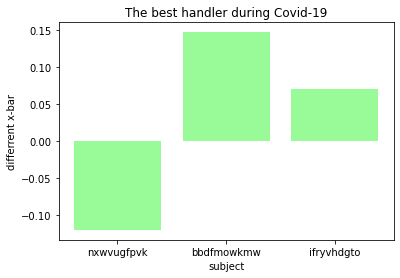

In [ ]:

##การหาว่าวิชาไหนรับมือเกี่ยวกับสถานการณ์covid ได้ดีที่สุดคือ การนำx-bar ก่อนที่จะมีการประเมินแบบcovid มาหาผลต่างกัน 

data_nxw = []  #nxw
covid_data_nxw = []
nm_data_nxw = []
result_nxw = []
name_nxw = []
for i in range(len(html_url)):
    if data[0][i][0][1] == "nxwvugfpvk" :  ##การคัดเฉพาะวิชาnxwvugfpvk
        data_nxw.append([data[0][i][0][1],data[1][i][4][1],data[1][i][-1][-2]]) ##ดึงชื่อวิชา และส่วนแบ่งว่าเป็นแบบประเมินแบบไหน และ x-bar มาจากเฉพาะวิชาnxwvugfpvk
        name_nxw.append(data[0][i][0][1])

# print(data_nxw)        
for a in range(len(data_nxw)):
    if len(data_nxw[a][1]) > 17: 
        covid_data_nxw.append(float(data_nxw[a][2])) ##การดึงข้อมูล x-bar ในการประเมิน covid เป็น float เพื่อที่จะพลอตกราฟได้
    else :
        nm_data_nxw.append(float(data_nxw[a][2])) ##การดึงข้อมูล x-bar ในการประเมิน ปรกติ เป็น float เพื่อที่จะพลอตกราฟได้
result_nxw = sum(covid_data_nxw)/len(covid_data_nxw)-sum(nm_data_nxw)/len(nm_data_nxw) ##เป็นการหาผลต่างระหว่างแบบประเมินที่เป็นแบบปรกติและแบบ covid โดยใช้สูตร ผลรวมข้อมูลcovid/จำนวน - ผลรวมข้อมูลปรกติ/จำนวน
print("--------------")
print(list(dict.fromkeys(name_nxw)))
print("%.3f" %result_nxw) #nxw


data_bbd = []  #bbd เหมือนกับส่วนของด้านบนแต่เป็นรายวิชา bbdfmowkmw
covid_data_bbd = []
nm_data_bbd = []
result_bbd = [] 
name_bbd = []
for i in range(len(html_url)):
    if data[0][i][0][1] == "bbdfmowkmw" : 
        data_bbd.append([data[0][i][0][1],data[1][i][4][1],data[1][i][-1][-2]])
        name_bbd.append(data[0][i][0][1])
        
# print(data_bbd)        
for a in range(len(data_bbd)):
    if len(data_bbd[a][1]) > 17: 
        covid_data_bbd.append(float(data_bbd[a][2]))
    else :
        nm_data_bbd.append(float(data_bbd[a][2]))
result_bbd = sum(covid_data_bbd)/len(covid_data_bbd)-sum(nm_data_bbd)/len(nm_data_bbd)
print("--------------")
print(list(dict.fromkeys(name_bbd)))
print("%.3f" %result_bbd) #bbd   


data_ifr = []  #ifr เหมือนกับส่วนของด้านบนแต่เป็นรายวิชา ifryvhdgto
covid_data_ifr = []
nm_data_ifr = []
result_ifr = [] 
name_ifr = []
for i in range(len(html_url)):
    if data[0][i][0][1] == "ifryvhdgto" : 
        data_ifr.append([data[0][i][0][1],data[1][i][4][1],data[1][i][-1][-2]])
        name_ifr.append(data[0][i][0][1])
# print(data_ifr)        
for a in range(len(data_ifr)):
    if len(data_ifr[a][1]) > 17: 
        covid_data_ifr.append(float(data_ifr[a][2]))
    else :
        nm_data_ifr.append(float(data_ifr[a][2]))
result_ifr = sum(covid_data_ifr)/len(covid_data_ifr)-sum(nm_data_ifr)/len(nm_data_ifr)
print("--------------")
print(list(dict.fromkeys(name_ifr)))
print("%.3f" %result_ifr) #ifr   
print("------------------------------------")

yy = []
all_name = []
xx = []

all_name = name_nxw+name_bbd+name_ifr ##เนื่องจากข้อมูลตอนนี้แยกlist กันอยู่ เราจึงต้องรวมให้มันอยู่list เดียวกันเพื่อให้พลอตกราฟได้
xx=list(dict.fromkeys(all_name))
print(xx)


yy.append(float("%.3f" %result_nxw)) ##เปลี่ยนจากlist ให้เป็นfloat ทศนิยม 3 ตำแหน่ง
yy.append(float("%.3f" %result_bbd))
yy.append(float("%.3f" %result_ifr))
print(yy)


x=np.array(xx) ##เนื่องจากmatplotlibต้องใช้ชุดเลขarray จึงต้องเปลี่ยน listให้กลายเป็น arrayเสียก่อน
y=np.array(yy)

plt.bar(x,y,color="#98FB98") #ขั้นตอนการพบลอตกราฟ
plt.xlabel("subject")
plt.ylabel("differrent x-bar")
plt.title("The best handler during Covid-19")
plt.show()


สรุป

จากการนำข้อมูลมา Coding และ Visualization พบข้อมูลที่น่าสนใจหลายอย่าง อย่างแรกคือ ข้อมูลความสนใจในการทำแบบประเมินของนักศึกษา นั้นสามารถบ่งบอกได้ถึงความสนใจในการเรียนเพราะ ส่วนใหญ่แล้วยิ่งมีจำนวนของนักศึกษาที่ลงเรียนวิชานั้นมากคะแนนเฉลี่ย และจำนวนของนักศึกษาที่ลงทะเบียนก็จะเพิ่มมากขึ้นเช่นกัน อย่างที่สองคือการนำคะแนนของ x-bar ที่มาการทำแบบประเมินในสถานการณ์ปกติมาเปรียบเทียบกันในแต่ละรายวิชาเป็นปีต่อปี ผลที่ได้คือ วิชา ryo เป็นวิชาที่มีทิศทางการเติบโตไปในทิศทางที่ดี เนื่องจากมีค่า x-bar ที่สูงขึ้นทุกภาคการศึกษาและ nxw เป็นวิชาที่มี x-bar สูงขึ้นนับตั้งแต่ปีแรกที่มีการประเมิน
อย่างสุดท้ายคือในข้อมูลที่ได้มาจะมีบางวิชาที่ได้รับข้อมูลการศึกษาทั้งในสถานการณ์ปกติและสถานการณ์ที่มีการแพร่ระบาดของ Covid-19 เมื่อนำการประเมินทั้ง 2 สถานการณ์มาเปรียบเทียบกันพบว่าวิชา bbd เป็นวิชาที่มีการรับมือกับสถานการณ์ Covid-19 ได้ดีเนื่องจากมีคะแนนเฉลี่ยของ x-bar ที่สูงขึ้นทุกภาคการศึกษา แม้จะมีสถานการณ์ Covid-19 เข้ามาเอี่ยวเช่นเดียวกับ วิชา ifr แต่วิชานี้จะไม่ดีเท่ากับวิชา bbd  และสุดท้ายวิชา nxw เป็นวิชาที่มีการรับมือกับสถานการณ์ Covid-19 ที่แย่เนื่องจากมีคะแนนเฉลี่ย x-bar น้อยลงจากปีที่มีการเรียนการสอนแบบปกติ